In [51]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import choices

## 1

The dataset
 heart_failure.csv contains medical records of patients with heart failure. It includes
 various clinical and demographic attributes that help analyze factors contributing to heart failure. Each
 record in the dataset represents a patient sample, with the goal of predicting ’death_event’ of the sample:
 False (y = 0) or True (y = 1).

 (1) Compute the Pearson correlation coefficient between ’ejection_fraction’ and ’serum_sodium’;
 ’ejection_fraction’ and ’creatinine_phosphokinase’. Then discuss if they are significant at the
 95% confidence level.

In [3]:
heart_df = pd.read_csv('heart_failure.csv')
heart_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,death_event
0,75.0,582,20,265000.00,1.9,130,1
1,55.0,7861,38,263358.03,1.1,136,1
2,65.0,146,20,162000.00,1.3,129,1
3,50.0,111,20,210000.00,1.9,137,1
4,65.0,160,20,327000.00,2.7,116,1


In [5]:
stats.pearsonr(heart_df['ejection_fraction'],heart_df['serum_sodium'])

PearsonRResult(statistic=0.17590228200796235, pvalue=0.002267684324417484)

The correlation between 'ejection_fraction' and 'serum_sodium' is statistically significant with confidence level $95$% since the pvalue $< 0.05$. Therefore we reject the null hypothesis of zero correlation.

In [6]:
stats.pearsonr(heart_df['ejection_fraction'],heart_df['creatinine_phosphokinase'])

PearsonRResult(statistic=-0.04407955445671149, pvalue=0.4476232991241134)

The correlation between 'ejection_fraction' and 'creatinine_phosphokinase' is not statistically significant with confidence level $95$% since the pvalue $> 0.05$. Therefore we cannot reject the null hypothesis of zero correlation.

(2) Write down the logistic regression model:y=’death_event’,
 X=[’age’,’creatinine_phosphokinase’, ’ejection_fraction’,’platelets’,’serum_creatinine’].
 Fit WITH the constant.

In [12]:
logit_m = sm.Logit(heart_df['death_event'], sm.add_constant(heart_df[['age','creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine']])).fit()

Optimization terminated successfully.
         Current function value: 0.506968
         Iterations 6


(3) Look at the output of the logistic regression model. Formally, which predictors have a significant
 influence on the response, at the 95% confidence level? Motivate your answer.

In [13]:
print(logit_m.summary())

                           Logit Regression Results                           
Dep. Variable:            death_event   No. Observations:                  299
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.1923
Time:                        17:46:21   Log-Likelihood:                -151.58
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.600e-14
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5076      0.942     -2.661      0.008      -4.355      -0.661
age                          0.0535      0.013      4.277      0.000       0.029       0.

The statistical significant regressors at $95$% confidence level are 'const', 'age', 'ejection_fraction' and 'serum_creatine' because the pvalue associated to their t-statistic is lower than $0.05$. For these regressors we reject the null hypothesis of zero coefficients. The remaining regressors are not statistically significant to this confidence level and we cannot reject the null hypothesis of zero coefficients.

 (4) Given that
 X_test=[constant, ’age’,’creatinine_phosphokinase’, ’ejection_fraction’,’platelets’,’serum_creatinine’],
 estimate the probability for y = 1 with X_test1=[const=1,78,200,38,404500,0.6] and
 X_test2=[const=1,1,55,500,12,303500,1]. What would be your prediction for y in these cases?

In [17]:
X_test1=[1,78,200,38,404500,0.6]
X_test2=[1,55,500,12,303500,1]

In [18]:
logit_m.predict(X_test1)

array([0.33754118])

Since the result is $\sim 0.34 < 0.5$ the prediction for 'X_test1' is $y=0$

In [19]:
logit_m.predict(X_test2)

array([0.56864098])

Since the result is $\sim 0.57 > 0.5$ the prediction for 'X_test2' is $y=1$

## 2.

 The AutoMPG dataset is used to study the relationship between vehicle characteristics and fuel
 efficiency. The dataset includes cylinders (number of engine cylinders), displacement (engine size in
 cubic inches), horsepower (engine power), weight (vehicle weight in pounds), acceleration (time to reach
 60 mph), and model year (year of manufacture).

 (1) Use the linear regression model (WITHOUT intercept) to describe the data above: y=’mpg’,
 x= ’acceleration’ then plot data and linear regression line (do not use regplot function). Has the
 predictor x a significant influence on the response, at the 95% confidence level? Motivate your
 answer. 

In [20]:
auto_df = pd.read_csv('auto_mpg.csv')
auto_df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,mpg
0,307.0,8,130.0,3504,12.0,70,18.0
1,350.0,8,165.0,3693,11.5,70,15.0
2,318.0,8,150.0,3436,11.0,70,18.0
3,304.0,8,150.0,3433,12.0,70,16.0
4,302.0,8,140.0,3449,10.5,70,17.0


In [21]:
lm = sm.OLS(auto_df['mpg'], auto_df['acceleration']).fit()

In [25]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              4328.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):                   1.46e-213
Time:                        17:57:04   Log-Likelihood:                         -1325.3
No. Observations:                 392   AIC:                                      2653.
Df Residuals:                     391   BIC:                                      2656.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

The predictor 'acceleration' is statistically significant with confidence level $95$% having a pvalue for t-statistic lower than $0.05$ so we can reject the null hypothesis of zero coefficient.  

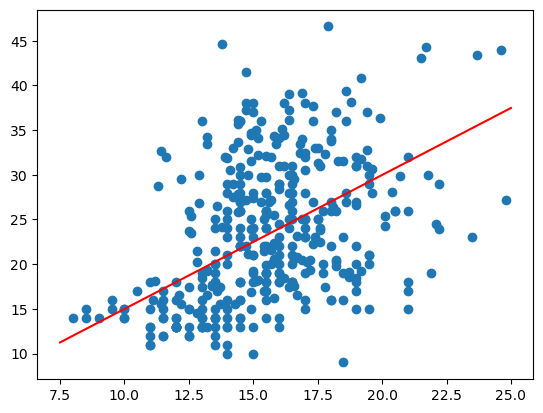

In [28]:
plt.plot(auto_df['acceleration'], auto_df['mpg'],'o')
plt.plot(np.linspace(7.5,25,100), lm.predict(np.linspace(7.5,25,100)), c = 'r')
plt.show()

 (2) Use the linear regression model (WITH intercept) to describe the data above:
 1- y=’mpg’, x= [’horsepower’].
 2- y=’mpg’, x= [’horsepower’,’weight’].
 3- y=’mpg’, x= [’horsepower’,’weight’,’model_year’]
 Describe each case; which predictors have a significant influence on the response, at the 95%
 confidence level? Motivate your answer.

 Which model performs better? Discuss in detail the quantities that need to be considered (and
 those that do not).

In [29]:
lm1 = sm.OLS(auto_df['mpg'], sm.add_constant(auto_df['horsepower'])).fit()

In [32]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        18:02:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

Both predictors are statistically significant at $95$%. We can reject the null hypothesis of zero coefficients.

In [30]:
lm2 = sm.OLS(auto_df['mpg'], sm.add_constant(auto_df[['horsepower','weight']])).fit()

In [33]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          3.06e-104
Time:                        18:03:29   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

All three predictors are statistically significant at $95$%. We can reject the null hypothesis of zero coefficients.

In [31]:
lm3 = sm.OLS(auto_df['mpg'], sm.add_constant(auto_df[['horsepower','weight','model_year']])).fit()

In [34]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     545.4
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          9.37e-139
Time:                        18:04:21   Log-Likelihood:                -1037.4
No. Observations:                 392   AIC:                             2083.
Df Residuals:                     388   BIC:                             2099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7194      4.182     -3.281      0.0

All predictors except for 'horsepower' are statistically significant at $95$%. For the regressor 'horsepower' in this case we cannot reject the null hypothesis of zero coefficient.

The third model (with three regressor and the constant) is the best one since it have an higher 'adjusted-$R^2$' than the other two and also lower values for both 'AIC' and 'BIC'.

In this model the quantity 'horsepower' is not statistically significant though.

(3) Describe the dataset; compute the average, variance, and quartiles of ’displacement’,’weight’.
 Plot them in a scatterplot.

In [36]:
auto_df[['displacement','weight']].describe()

,displacement,weight
count,392.000000,392.000000
mean,194.411990,2977.584184
std,104.644004,849.402560
min,68.000000,1613.000000
25%,105.000000,2225.250000
50%,151.000000,2803.500000
75%,275.750000,3614.750000
max,455.000000,5140.000000


Let's compute the variances

In [37]:
np.var(auto_df['displacement'])

10922.432942979489

In [38]:
np.var(auto_df['weight'])

719644.18679066

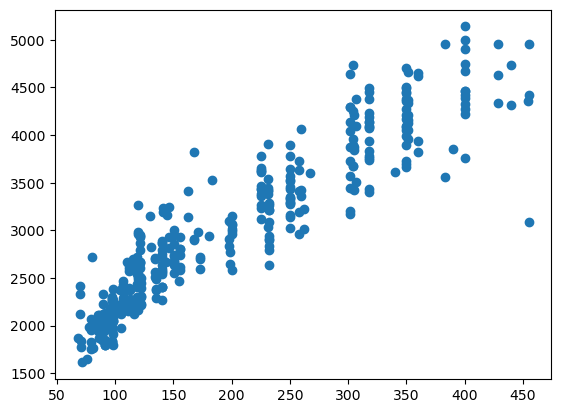

In [40]:
plt.scatter(auto_df['displacement'], auto_df['weight'])
plt.show()

 (4) Compute the Pearson correlation coefficient between all the columns and plot the results in a
 heatmap 

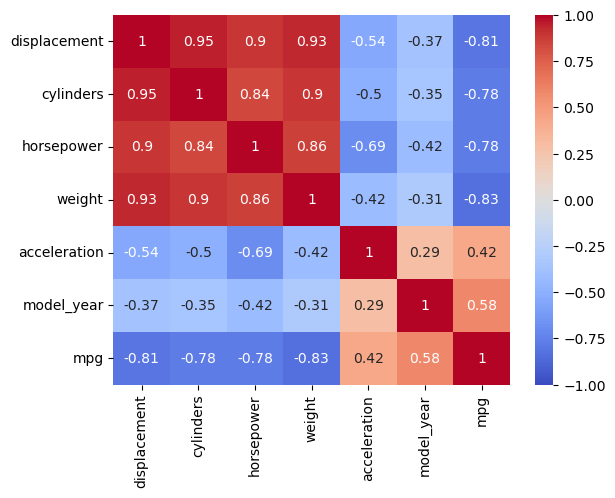

In [ ]:
sns.heatmap(auto_df.corr(), annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

 (5) Are ’acceleration’ and ’horsepower’, and, ’acceleration’ and ’model_year’ correlated according
 to the Spearman correlation? How? Is it significant (95%)? Discuss explicitly the results. 

In [43]:
stats.spearmanr(auto_df['acceleration'], auto_df['horsepower'])

SignificanceResult(statistic=-0.6581423040218369, pvalue=5.157840368072828e-50)

The two attributes are negatively correlated and it's statistically significant at $95$% confidence level. We can reject the null hypothesis of zero correlation since the pvalue $< 0.05$

In [44]:
stats.spearmanr(auto_df['acceleration'], auto_df['model_year'])

SignificanceResult(statistic=0.27830640387945466, pvalue=2.0984954188030466e-08)

The two attributes are positively correlated and it's statistically significant at $95$% confidence level. We can reject the null hypothesis of zero correlation since the pvalue $< 0.05$

 ## 3.

 Suppose we observe n realizations y1,...,yn of n independent random variables, Y1,...,Yn from a
 uniform distribution on the interval [−θ,θ]. Consider the alternative estimator for the parameter θ^2 Z where c > 0 is a constant. Fix c = 8 and implement the estimator above.


 (1) A simple computation shows that E[Z] = n
 (n−8)θ2 Is Z biased or unbiased? Is Z asymptotically
 unbiased? Motivate your answer.

This is biased since $E[Z] \neq \theta^2$. It is asyptotically unbiased because $\lim_{n \rightarrow \infty} E[Z](n) = \theta^2$

 Randomly draw 20 observations from the uniform distribution and compute an estimate using
 Z. Repeat this procedure 5000 times. 

In [ ]:
Z_arr = np.zeros(5000)

for j in range(5000):
    Y_i = stats.uniform.rvs(loc = -1, scale = 1, size = 20) # I fixed theta = 1
    Z = (3/(20 - 8))*np.sum(Y_i**2)
    Z_arr[j] = Z

(3) Plot a histogram and cumulative distribution of Z

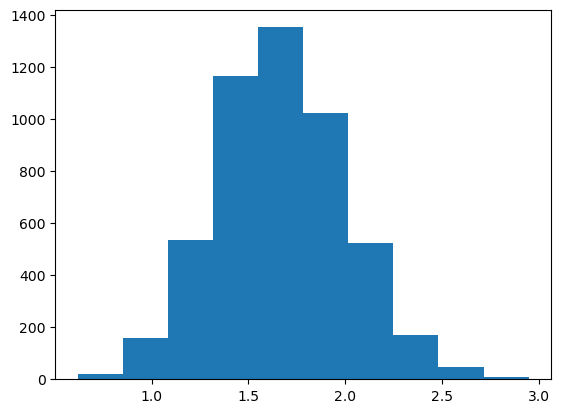

In [62]:
plt.hist(Z_arr)
plt.show()

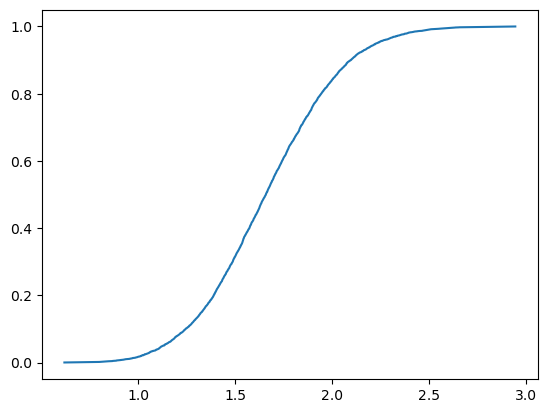

In [63]:
plt.plot(np.sort(Z_arr), np.arange(1,len(Z_arr)+1)/len(Z_arr))
plt.show()

## 4

4.1. A group of nutritionists is studying the impact of three different diet plans on weight
 loss success. Ninety participants were randomly assigned to one of the three diet plans,
 with 30 participants per plan. At the end of the study, each participant’s outcome was
 classified as either successful or unsuccessful, and the results were compiled into a contin
gency table. To determine if there is a relationship between the diet plan followed and
 weight loss success, the researchers want to test the null hypothesis that these variables
 are independent. What statistical test should they employ?

Answer: 

c. chi-squared test

 4.2. When selecting a regression model, which of the following is true about the Akaike
 Information Criterion (AIC)?.

Answer:

a. The lower the AIC value, the better the model

 4.3. You have two containers of different volumes. Each container’s liquid level is measured
 50 times. Which test should you use to determine if the two variances are the same?

Answer:

e. F-test

 ## 5.

 Given the dataset
 power_consumption.csv
 (1) plot a QQ plot; ’Voltage’ against Gaussian quantiles to check whether the sample is normal (i.e.
 Gaussian) (2 points)
 (2) Test if ’Voltage’ is normally (i.e. Gaussian) distributed by performing a Kolmogorov-Smirnov
 test, with a confidence level of 95%. Discuss the results. (2 points)
 (3) Compute the confidence interval, with a confidence level of 90%, of the variance of the variable
 ’Global_active_power’ and maximum value of the variable ’Global_reactive_power’ with a
 number of bootstrap samples equal to 550. (3 points)

In [46]:
power_df = pd.read_csv('power_consumption.csv')
power_df.head()

,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29
3,5.388,0.502,233.74
4,3.666,0.528,235.68


### 1.

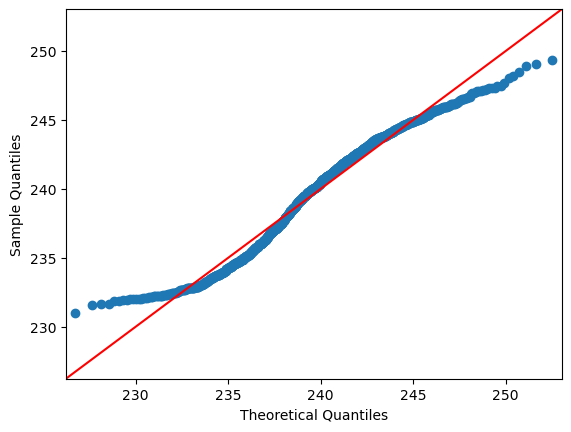

In [49]:
sm.qqplot(power_df['Voltage'], stats.norm(np.mean(power_df['Voltage']),np.std(power_df['Voltage'], ddof = 1)), line = '45')
plt.show()

(2) Test if ’Voltage’ is normally (i.e. Gaussian) distributed by performing a Kolmogorov-Smirnov
 test, with a confidence level of 95%. Discuss the results. 

In [50]:
stats.kstest(power_df['Voltage'], 'norm', args=(np.mean(power_df['Voltage']),np.std(power_df['Voltage'], ddof = 1)))

KstestResult(statistic=0.05639907563644683, pvalue=0.0017539102489071367, statistic_location=235.28, statistic_sign=1)

The result is statistically significant at $95$%, i.e. we can reject the null hypothesis of normally distributed sample.

(3) Compute the confidence interval, with a confidence level of 90%, of the variance of the variable
 ’Global_active_power’ and maximum value of the variable ’Global_reactive_power’ with a
 number of bootstrap samples equal to 550.

In [52]:
nboot = 550
var_l = []
max_l = []

for i in range(nboot):
    samp1 = choices(power_df['Global_active_power'], k = len(power_df))
    samp2 = choices(power_df['Global_reactive_power'], k = len(power_df))
    var_l.append(np.var(samp1))
    max_l.append(np.max(samp2))

In [55]:
np.quantile(var_l, [0.05, 0.95])

array([1.50275466, 1.76158071])

In [56]:
np.quantile(max_l, [0.05, 0.95])

array([0.52 , 0.528])